In [3]:
"""

Objectives:

1. Define state structure with a list of HumanMessage objects.
2. Initialize a Claude model using LangChain.
3. Sending and handling different types of messages.
4. Building and compiling the graph of the Agent.

Main Goal: How to integrate LLMs in our graph.

"""

'\n\nObjectives:\n\n1. Define state structure with a list of HumanMessage objects.\n2. Initialize a Claude model using LangChain.\n3. Sending and handling different types of messages.\n4. Building and compiling the graph of the Agent.\n\nMain Goal: How to integrate LLMs in our graph.\n\n'

In [33]:
from getpass import getpass
import os

# Prompt for Claude API key (input is hidden)
claude_api_key = getpass("Enter your Claude API Key: ")
os.environ["ANTHROPIC_API_KEY"] = claude_api_key


Enter your Claude API Key: ··········


In [34]:
model = ChatAnthropic(
    model="claude-sonnet-4-20250514",
    temperature=0.7,
    anthropic_api_key=claude_api_key  # explicitly pass the key
)

In [35]:
!pip install langchain_anthropic

In [36]:
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langchain_anthropic import ChatAnthropic
from langgraph.graph import StateGraph, START, END

In [37]:
class AgentState(TypedDict):
  messages: List[HumanMessage]

In [38]:
def process(state: AgentState) -> AgentState:
  response = model.invoke(state['messages'])
  print(f"\nAI: {response.content}")
  return state

In [39]:
graph = StateGraph(AgentState)

graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)

agent = graph.compile()

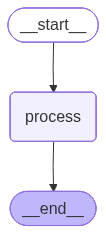

In [40]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

In [49]:
user_input = input("Enter: ")
while user_input != "exit":
  agent.invoke({"messages": [HumanMessage(content = user_input)]})
  user_input = input("Enter: ")

Enter: How's the weather in New york right now with time?

AI: I don't have access to real-time weather data or current time information. To get the current weather and time in New York, I'd recommend:

1. **Weather apps/websites:**
   - Weather.com
   - AccuWeather
   - Weather Underground
   - Your phone's built-in weather app

2. **Quick search:** Simply search "New York weather" in your web browser

3. **Voice assistants:** Ask Siri, Google Assistant, or Alexa

These sources will give you up-to-date information including current temperature, conditions, time, and forecasts for New York City.

Is there anything else about New York weather patterns or climate that I can help you with using general information?
Enter: How can i recommend and take action on spike issues?

AI: Here's a comprehensive approach to identifying, recommending solutions for, and taking action on spike issues:

## 1. **Identify Spike Issues**

**Monitoring & Detection:**
- Set up real-time monitoring and alerti